In [ ]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
file = open('/content/drive/MyDrive/IR Assignments/A2/Q3_Dataset.txt', 'r')
lines = file.readlines()

In [ ]:
useful_lines = []
for i in lines:
    if 'qid:4 ' in i:
        useful_lines.append(i)
len(useful_lines)

103

In [ ]:
x = 0
final_data = []
for i in useful_lines:
    index = x
    x+=1
    rel_score = int(i[0])
    data = i[2:]
    final_data.append((index, rel_score, data))

In [ ]:
final_data[0]

(0,
 0,
 'qid:4 1:3 2:0 3:2 4:0 5:3 6:1 7:0 8:0.666667 9:0 10:1 11:999 12:0 13:110 14:5 15:1114 16:14.976692 17:28.949002 18:25.594644 19:28.531344 20:14.972391 21:20 22:0 23:5 24:0 25:25 26:1 27:0 28:0 29:0 30:1 31:12 32:0 33:4 34:0 35:16 36:6.666667 37:0 38:1.666667 39:0 40:8.333333 41:20.222222 42:0 43:2.888889 44:0 45:37.555556 46:0.02002 47:0 48:0.045455 49:0 50:0.022442 51:0.001001 52:0 53:0 54:0 55:0.000898 56:0.012012 57:0 58:0.036364 59:0 60:0.014363 61:0.006673 62:0 63:0.015152 64:0 65:0.007481 66:0.00002 67:0 68:0.000239 69:0 70:0.00003 71:77.577533 72:0 73:30.667985 74:0 75:90.53171 76:5.52713 77:0 78:0 79:0 80:5.526745 81:57.882066 82:0 83:18.750101 84:0 85:66.125373 86:25.859178 87:0 88:10.222662 89:0 90:30.177237 91:525.177766 92:0 93:60.031269 94:0 95:675.850674 96:1 97:0 98:0 99:0 100:1 101:0.875901 102:0 103:0.66135 104:0 105:0.864571 106:28.756809 107:0 108:3.274639 109:0 110:28.985515 111:-17.640291 112:-29.251906 113:-20.596041 114:-31.107208 115:-17.519629 116:-19

In [ ]:
sorted_final_data = sorted(final_data, key=lambda x: x[1], reverse=True) 

In [ ]:
sorted_final_data

In [ ]:
for i in sorted_final_data:
    line = str(i[1]) + ' ' + i[2]
    file = open('sorted_file.txt', 'a')
    file.write(line)

In [ ]:
relevance_counts = {}
for i in sorted_final_data:
    rel = i[1]
    relevance_counts[rel] = relevance_counts.get(rel, 0) + 1
relevance_counts

{3: 1, 2: 17, 1: 26, 0: 59}

In [ ]:
import math
num_max_files = 1
for i in relevance_counts:
    num_max_files *= math.factorial(relevance_counts[i])

In [ ]:
def dcg(data):
    dcg = int(data[0][1])
    for i in range(1, len(data)):
        rel_score = int(data[i][1])
        dcg += rel_score/math.log2(i+1)
    return dcg        

In [ ]:
def ndcg(og_data, sorted_data, limit):
    ideal_dcg = dcg(sorted_data[:limit])
    normal_dcg = dcg(og_data[:limit])

    return normal_dcg/ideal_dcg

In [ ]:
ndcg50 = ndcg(final_data, sorted_final_data, 50)
ndcg_full = ndcg(final_data, sorted_final_data, len(final_data))

print("NDCG for 50: " + str(ndcg50))
print("NDCG for entire dataset: " + str(ndcg_full))

NDCG for 50: 0.3521042740324887
NDCG for entire dataset: 0.5979226516897831


In [ ]:
data_with_75th_feature = []
x = 0
for i in useful_lines:
    index = x
    data = i.split()
    rel_score = int(data[0])
    reqd_feature = float(data[76].split(':')[1])
    rest_data = i[2:]
    data_with_75th_feature.append((index, rel_score, reqd_feature, rest_data))

In [ ]:
ranked_data_with_75th_feature = sorted(data_with_75th_feature, key=lambda x: x[2], reverse=True) 

In [ ]:
len(ranked_data_with_75th_feature)

103

In [ ]:
total_relevant = 0
for i in ranked_data_with_75th_feature:
    rel_score = int(i[1])
    if(rel_score!=0):
        total_relevant += 1

In [ ]:
total_relevant

44

In [ ]:
precisions = []
recalls = []
current_relevant = 0
for i in range(len(ranked_data_with_75th_feature)):
    if(ranked_data_with_75th_feature[i][1] != 0):
        current_relevant +=1    
    precisions.append(current_relevant / (i+1))
    recalls.append(current_relevant/total_relevant)     



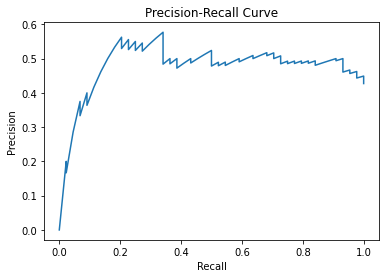

In [ ]:
import matplotlib.pyplot as plt
plt.plot(recalls, precisions)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Precision-Recall Curve")
plt.show()